# AIR BNB DATA DEEP DIVE - PYTHON + PANDAS CHALLENGE


# Libraries Installation

In [2]:
# Importing libraries
#!pip install matplotlib seaborn
# pip install geopy
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


# Data Extraction and Ingestion

In [3]:
# Loading the dataset
url = 'https://data.insideairbnb.com/united-kingdom/england/london/2025-06-10/visualisations/listings.csv'


In [4]:
# Reading the dataset
airbnb_data = pd.read_csv(url)


In [5]:
# Loading the dataset to a csv file if it exist, replaces the old one
airbnb_data.to_csv('airbnb_listings_london.csv', index=False, header=True)

# Data Exploration

In [6]:
# Convert to a dataframe for exploration process
data = pd.DataFrame(airbnb_data)
# Display the first 5 rows of the dataset
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN


In [7]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [8]:
# Statistical summary of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,96651.0,6.526020e+17,5.708808e+17,13913.000000,2.955518e+07,8.123206e+17,1.197378e+18,1.439673e+18
host_id,96651.0,2.091790e+08,2.141266e+08,2594.000000,2.673176e+07,1.128684e+08,4.063762e+08,7.001298e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,96651.0,5.150982e+01,4.894527e-02,51.295937,5.148424e+01,5.151379e+01,5.153910e+01,5.168263e+01
longitude,96651.0,-1.270866e-01,1.008529e-01,-0.496760,-1.890604e-01,-1.269900e-01,-6.788000e-02,2.789600e-01
price,62684.0,2.133661e+02,8.609016e+02,6.000000,7.500000e+01,1.350000e+02,2.250000e+02,7.410000e+04
minimum_nights,96651.0,5.429504e+00,2.331509e+01,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,1.125000e+03
number_of_reviews,96651.0,2.089173e+01,4.992227e+01,0.000000,0.000000e+00,4.000000e+00,1.900000e+01,1.855000e+03
reviews_per_month,71487.0,9.588770e-01,1.282595e+00,0.010000,1.500000e-01,5.000000e-01,1.230000e+00,3.841000e+01
calculated_host_listings_count,96651.0,1.638937e+01,5.329958e+01,1.000000,1.000000e+00,2.000000e+00,8.000000e+00,4.950000e+02


In [9]:
# To determine the number of rows and columns  in the dataset
datashape = data.shape
print(f'The number of rows are {datashape[0]} and number of columns are {datashape[1]}')

# Data types of each column
datatype = data.dtypes
datatype

The number of rows are 96651 and number of columns are 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [10]:
#Checking for missing values in the dataset
missing_value = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missingpct = data.isnull().sum().sort_values(ascending=False) / len(data) *100
missing_data = pd.DataFrame({'Missing_values':missing_value, 'Percentage': missingpct})

print(missing_data)

                                Missing_values  Percentage
license                                  96651  100.000000
neighbourhood_group                      96651  100.000000
price                                    33967   35.143972
reviews_per_month                        25164   26.035944
last_review                              25164   26.035944
host_name                                   40    0.041386
name                                         0    0.000000
id                                           0    0.000000
neighbourhood                                0    0.000000
host_id                                      0    0.000000
room_type                                    0    0.000000
longitude                                    0    0.000000
latitude                                     0    0.000000
number_of_reviews                            0    0.000000
minimum_nights                               0    0.000000
calculated_host_listings_count               0    0.0000

In [11]:
# Check duplicated rows in the dataset
duplicated_rows = data.duplicated().sum()
print(f' The number of duplicated rows in the dataset is {duplicated_rows}')

 The number of duplicated rows in the dataset is 0


In [12]:
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


# Data Cleaning

In [13]:
uniquevalue = data['price'].unique()
print(uniquevalue)

[ 297.   98.  148. ...  940. 1574. 1528.]


In [14]:
# Perform data type conversion on last_review column
data['last_review'] = pd.to_datetime(data['last_review'],format='%Y-%m-%d', errors='coerce')
data.head(3)
# Confirm the new data type of last_review column
print(data['last_review'].dtypes)

datetime64[ns]


Handling missing values

In [ ]:
# Extracted the unique neighborhoods from the dataset so as to 
# map them to their respective boroughs/districts
unique_neighborhoods = data['neighbourhood'].unique()
unique_neighborhoods

array(['Lewisham', 'Camden', 'Lambeth', 'Richmond upon Thames',
       'Hillingdon', 'Hammersmith and Fulham', 'Waltham Forest',
       'Hounslow', 'Westminster', 'Hackney', 'Ealing',
       'Kensington and Chelsea', 'Greenwich', 'Merton', 'Haringey',
       'Tower Hamlets', 'Barking and Dagenham', 'Southwark', 'Brent',
       'Newham', 'Wandsworth', 'Islington', 'Barnet', 'Croydon',
       'City of London', 'Redbridge', 'Enfield', 'Havering',
       'Kingston upon Thames', 'Bromley', 'Bexley', 'Sutton', 'Harrow'],
      dtype=object)

In [ ]:
# Got the borough/district for each unique neighbourhood gotten online.
borough_district = {
    'Camden': 'Central London',
    'City of London': 'Central London',
    'Islington': 'Central London',
    'Kensington and Chelsea': 'West London',
    'Westminster': 'Central London',
    'Hammersmith and Fulham': 'West London',
    'Wandsworth': 'South West London',
    'Lambeth': 'South London',
    'Southwark': 'South London',
    'Lewisham': 'South East London',
    'Greenwich': 'South East London',
    'Bromley': 'South East London',
    'Bexley': 'South East London',
    'Croydon': 'South London',
    'Merton': 'South West London',
    'Sutton': 'South West London',
    'Kingston upon Thames': 'South West London',
    'Richmond upon Thames': 'South West London',
    'Hounslow': 'West London',
    'Ealing': 'West London',
    'Brent': 'North West London',
    'Harrow': 'North West London',
    'Barnet': 'North London',
    'Enfield': 'North London',
    'Haringey': 'North London',
    'Hackney': 'East London',
    'Tower Hamlets': 'East London',
    'Newham': 'East London',
    'Waltham Forest': 'East London',
    'Redbridge': 'East London',
    'Barking and Dagenham': 'East London',
    'Havering': 'East London',
    'Hillingdon': 'West London'
}

data['neighbourhood_group'] = data['neighbourhood'].map(borough_district)
data.head(3)

In [ ]:
# Previous code to get the district/borough using geopy library
# Initialize geolocator
geolocator = Nominatim(user_agent="district")

# Add a rate limiter to avoid hitting the API limit
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Example function to extract district/borough
def get_borough(lat, lon):
    try:
        location = geocode((lat, lon), exactly_one=True)
        if location and 'address' in location.raw:
            address = location.raw['address']
            # Different areas may have district info under keys like 'borough' or 'suburb'
            return (
                address.get('borough') or
                address.get('suburb') or
                address.get('city_district') or
                address.get('county')
            )
    except Exception as e:
        return None

# Apply to your DataFrame (example for first few rows)
data['neighbourhood_group'] = data.apply(lambda x: get_borough(x['latitude'], x['longitude']), axis=1)
# To optimize, extract unique lat-long pairs first
unique_coords = data[['latitude', 'longitude']].drop_duplicates()
unique_coords['neighbourhood_group'] = unique_coords.apply(lambda x: get_borough(x['latitude'], x['longitude']), axis=1)        
# Now unique_coords has lat, lon, and their corresponding neighbourhood_group   
# Merge back to main DataFrame
data = data.merge(unique_coords, on=['latitude', 'longitude'], how='left')  



KeyboardInterrupt: 

In [ ]:
# Handle missing values in neighbourhood_group.

# Drop neighbourhood_group and license fields
data.drop(['license'], axis=1, inplace=True)
#To confirm the columns have been dropped
data.head(3)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,264776,Huge Four Bedroom Apartment,1389063,Sue,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12
1,264777,One Bedroom Apartment,1389063,Sue,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6


In [ ]:
# Replacing missing values in reviews_per_month with average of the column
data['reviews_per_month']=  data['reviews_per_month'].fillna(data['reviews_per_month'].median())

# To confirm there are no more null values in reviews_per_month
filterrpm = data[data['reviews_per_month'].isnull() ==True]
filterrpm


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [ ]:
# Handling missing values in host_name by propagating the first available name per host_id

# Fill missing host_name by propagating the first available name per host_id
data['host_name'] = data['host_name'].fillna(
    data.groupby('host_id')['host_name'].transform('first')
)

# Confirm there are no more null values in host_name
data['host_name'].isnull().sum()  

np.int64(40)

In [ ]:
# Checking irrelevant rows based on listings with zero availability or price)

zero_availability = data[data['availability_365'] == 0]
zero_price = data[data['price'] == 0]
print(f'The availabilty_365 field has {zero_availability.shape[0]} row(s) with zero value while the price field has {zero_price.shape[0]} row(s) with zero value')

The availabilty_365 field has 30163 row(s) with zero value while the price field has 0 row(s) with zero value


In [ ]:
# Remove irrelevant rows (e.g., listings with zero availability or price)
# Filter out rows where availability is equal to zero
data = data[data['availability_365'] != 0]
data.shape

(66488, 16)

# Data Enrichment

In [ ]:
# Create a price_per_booking column using price and minimum_nights.

data['price_per_booking'] = data['price'] * data['minimum_nights']
data.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_booking
0,264776,Huge Four Bedroom Apartment,1389063,Sue,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,891.0
1,264777,One Bedroom Apartment,1389063,Sue,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,294.0
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,444.0


In [ ]:
# Availabilty_365 grouped into various categories based on the bins and labels specified
bins = [0,100,301,367]
labels = ['Rare', 'Part-time', 'Full-time']
data['availability_bucket'] = pd.cut(data['availability_365'], bins=bins, labels=labels, right=False)
data.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_booking,availability_bucket
0,264776,Huge Four Bedroom Apartment,1389063,Sue,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,891.0,Part-time
1,264777,One Bedroom Apartment,1389063,Sue,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,294.0,Full-time
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,444.0,Full-time


# Data Analysis using Pandas

**Answering business questions by analysing the cleaned and enriched data**

In [ ]:
# Rename the cleaned and enriched data for analysis easy reference
df = data
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_booking,availability_bucket
0,264776,Huge Four Bedroom Apartment,1389063,Sue,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,891.0,Part-time
1,264777,One Bedroom Apartment,1389063,Sue,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,294.0,Full-time
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,444.0,Full-time
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,432.0,Full-time
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,471.0,Part-time


### 1. What are the top 10 most expensive neighborhoods by average price?

In [ ]:
#1. What are the top 10 most expensive neighborhoods by average price?

expensive_neighbourhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending= False).head(10)
expensive_neighbourhoods


neighbourhood
City of London            379.090909
Lambeth                   371.780972
Kensington and Chelsea    362.972805
Westminster               343.499335
Camden                    229.625084
Islington                 218.462021
Hammersmith and Fulham    193.441929
Wandsworth                189.752249
Richmond upon Thames      184.709962
Brent                     169.960661
Name: price, dtype: float64

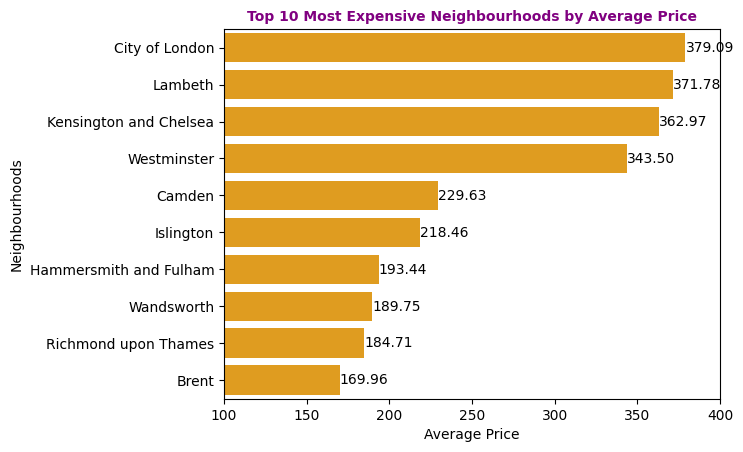

In [ ]:
# Plotting a horizontal bar chart for the top 10 most expensive neighborhoods by average 
# price using seaborn and to display the average price on each bar
sns.barplot(x=expensive_neighbourhoods.values, y=expensive_neighbourhoods.index, legend = False,color = 'orange' )
plt.title('Top 10 Most Expensive Neighbourhoods by Average Price',fontweight = 'bold', color ='purple', fontsize = 10)
plt.xlabel('Average Price')
#limiting the x-axis to 100 - 400
plt.xlim(100, 400)
plt.ylabel('Neighbourhoods')
plt.xticks(rotation = 0)
for index, value in enumerate(expensive_neighbourhoods.values):
  plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout
plt.show()

### 2. What’s the average availability and price by room type?

In [ ]:
# What’s the average availability and price by room type?
room_type_analysis = (df.groupby('room_type', as_index=False).agg({
    'availability_365': 'mean' , 
    'price':'mean'
    }))
room_type_analysis.rename(
    columns={
        'availability_365':'average_availability',
        'price':'average_price'
    }, inplace=True)

# Rounding off the average availability to nearest integer and average price to 2 decimal places
room_type_analysis['average_availability'] =room_type_analysis['average_availability'].round(0).astype(int)
room_type_analysis['average_price'] = room_type_analysis['average_price'].round(2)

bins = [0,100,301,367]
labels = ['Rare', 'Part-time', 'Full-time']
room_type_analysis['availability_bucket']= pd.cut(room_type_analysis['average_availability'], bins=bins, labels=labels, right=False)

room_type_analysis

,room_type,average_availability,average_price,availability_bucket
0,Entire home/apt,198,256.60,Part-time
1,Hotel room,250,310.97,Part-time
2,Private room,213,120.02,Part-time
3,Shared room,261,83.64,Part-time


### 3. Which host has the most listings?

In [ ]:
# Compute actual listing count from df using host_id and host_name count of rows
actual_counts = (df.groupby(['host_id', 'host_name']).size().reset_index(name='actual_listing_count'))
                 
# Get mximum recorded number from calculated_host_listings_count field
recorded_counts = (df.groupby(['host_name', 'host_id'])['calculated_host_listings_count'].max().reset_index(name='recorded_listing_count'))    

# Merging both on host_id and host_name
host_comparison = pd.merge(actual_counts, recorded_counts, on=['host_id', 'host_name'], how='left')

# I would like to see the difference between actual and recorded listing counts
host_comparison['difference'] = host_comparison['recorded_listing_count'] - host_comparison['actual_listing_count']

# Sort to see top hosts and discrepancies
host_comparison.sort_values(by='actual_listing_count', ascending=False, inplace=True)

host_comparison.head(5)

,host_id,host_name,actual_listing_count,recorded_listing_count,difference
24591,446820235,LuxurybookingsFZE,495,495,0
21855,314162972,Blueground,402,420,18
695,1432477,City Relay,200,246,46
9496,33889201,Matthew,197,197,0
17738,156158778,Léa,130,213,83


In [ ]:
#To get the first record using iloc
top_host = host_comparison.iloc[0]['host_name']
top_listing_count = host_comparison.iloc[0]['recorded_listing_count']

print("The host with the most listings is", top_host, "with", top_listing_count, "listings.")

The host with the most listings is LuxurybookingsFZE with 495 listings.


In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

NameError: name 'df' is not defined